<a href="https://colab.research.google.com/github/alberto1971/Curso-de-introduccion-a-Big-Data-Parte-4-nov2021/blob/main/Reconocimiento_de_d%C3%ADgitos_con_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.sitepoint.com/keras-digit-recognition-tutorial/


Durante la última década, el uso de redes neuronales artificiales (ANN) ha aumentado considerablemente. ¡La gente ha utilizado las ANN en diagnósticos médicos, para predecir los precios de Bitcoin y para crear videos falsos de Obama! 
En este tutorial crearemos un modelo para reconocer dígitos escritos a mano.


Usaremos la biblioteca de Keras para entrenar el modelo en este tutorial. Keras es una biblioteca de alto nivel en Python que es un contenedor de TensorFlow, CNTK y Theano. De forma predeterminada, Keras usa un backend de TensorFlow de forma predeterminada, y usaremos el mismo para entrenar nuestro modelo.

#Redes Neuronales Artificiales RNAs (ANNs Artificial Neural Networks) 

Las redes de neuronas artificiales (denominadas habitualmente como RNA o en inglés como: "ANN" ) son un paradigma de aprendizaje y procesamiento automático inspirado en la forma en que funciona el sistema nervioso de los animales. Se trata de un sistema de interconexión de neuronas que colaboran entre sí para producir un estímulo de salida. En inteligencia artificial es frecuente referirse a ellas como redes de neuronas o redes neuronales.

Las redes neuronales son sistemas ideados como abstracciones de las estructuras neurobiológicas (cerebros) encontradas en la naturaleza y tienen la característica de ser sistemas desordenados capaces de guardar información.



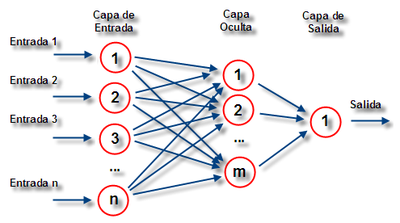

Una red neuronal artificial es un modelo matemático que convierte un conjunto de entradas en un conjunto de salidas a través de varias capas ocultas. Una ANN funciona con capas ocultas, cada una de las cuales es una forma transitoria asociada con una probabilidad. En una red neuronal típica, cada nodo de una capa toma como entrada todos los nodos de la capa anterior. Un modelo puede tener una o más capas ocultas.

Las ANN reciben una capa de entrada para transformarla a través de capas ocultas. Una ANN se inicializa asignando pesos y sesgos aleatorios a cada nodo de las capas ocultas. A medida que los datos de entrenamiento se introducen en el modelo, modifica estos pesos y sesgos utilizando los errores generados en cada paso. Por lo tanto, nuestro modelo "aprende" el patrón cuando revisa los datos de entrenamiento.

Una red neuronal se compone de unidades llamadas neuronas. Cada neurona recibe una serie de entradas a través de interconexiones y emite una salida. Esta salida viene dada por tres funciones:

Una función de propagación (también conocida como función de excitación), que por lo general consiste en el sumatorio de cada entrada multiplicada por el peso de su interconexión (valor neto). Si el peso es positivo, la conexión se denomina excitatoria; si es negativo, se denomina inhibitoria.

Una función de activación, que modifica a la anterior. Puede no existir, siendo en este caso la salida la misma función de propagación.

Una función de transferencia, que se aplica al valor devuelto por la función de activación. Se utiliza para acotar la salida de la neurona y generalmente viene dada por la interpretación que queramos darle a dichas salidas. 


La mayoría de los científicos coinciden en que una RNA es muy diferente en términos de estructura de un cerebro animal. Al igual que el cerebro, una RNA se compone de un conjunto masivamente paralelo de unidades de proceso muy simples y es en las conexiones entre estas unidades donde reside la inteligencia de la red. Sin embargo, en términos de escala, un cerebro es muchísimo mayor que cualquier RNA creada hasta la actualidad, y las neuronas artificiales también son más simples que su contrapartida animal


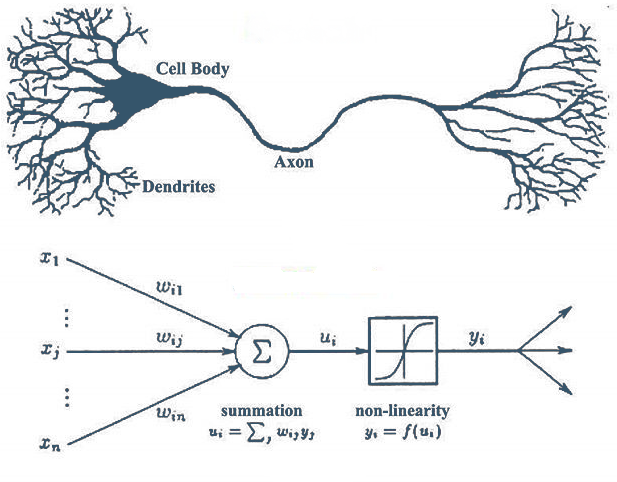

##Ventajas

Las redes neuronales artificiales (RNA) tienen muchas ventajas debido a que están basadas en la estructura del sistema nervioso, principalmente el cerebro.

- Aprendizaje: Las RNA tienen la habilidad de aprender mediante una etapa que se llama etapa de aprendizaje. Esta consiste en proporcionar a la RNA datos como entrada a su vez que se le indica cuál es la salida (respuesta) esperada.
- Auto organización: Una RNA crea su propia representación de la información en su interior, quitándole esta tarea al usuario.
- Tolerancia a fallos: Debido a que una RNA almacena la información de forma redundante, ésta puede seguir respondiendo de manera aceptable aun si se daña parcialmente.
- Flexibilidad: Una RNA puede manejar cambios no importantes en la información de entrada, como señales con ruido u otros cambios en la entrada (por ejemplo si la información de entrada es la imagen de un objeto, la respuesta correspondiente no sufre cambios si la imagen cambia un poco su brillo o el objeto cambia ligeramente).
- Tiempo real: La estructura de una RNA es paralela, por lo cual si esto es implementado con computadoras o en dispositivos electrónicos especiales, se pueden obtener respuestas en tiempo real.

##Redes neuronales convolucionales (CNNs Convoluted Neural Networks)

En este tutorial, identificaremos dígitos, que es una versión simple de la clasificación de imágenes. Una imagen es esencialmente una colección de puntos o píxeles. Un píxel se puede identificar a través de los colores que lo componen (RGB). Por lo tanto, los datos de entrada de una imagen son esencialmente una matriz 2D de píxeles, cada uno de los cuales representa un color.

Si tuviéramos que entrenar una red neuronal normal basada en datos de imágenes, tendríamos que proporcionar una larga lista de entradas, cada una de las cuales estaría conectada a la siguiente capa oculta. Esto dificulta la ampliación del proceso.

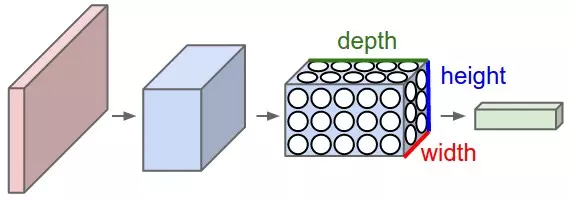

En una red neuronal convolucional (CNN), las capas se organizan en una matriz 3D (coordenada del eje X, coordenada del eje Y y color). En consecuencia, un nodo de la capa oculta solo estaría conectado a una pequeña región en la vecindad de la capa de entrada correspondiente, haciendo que el proceso sea mucho más eficiente que una red neuronal tradicional. Por lo tanto, las CNN son populares cuando se trata de trabajar con imágenes y videos.

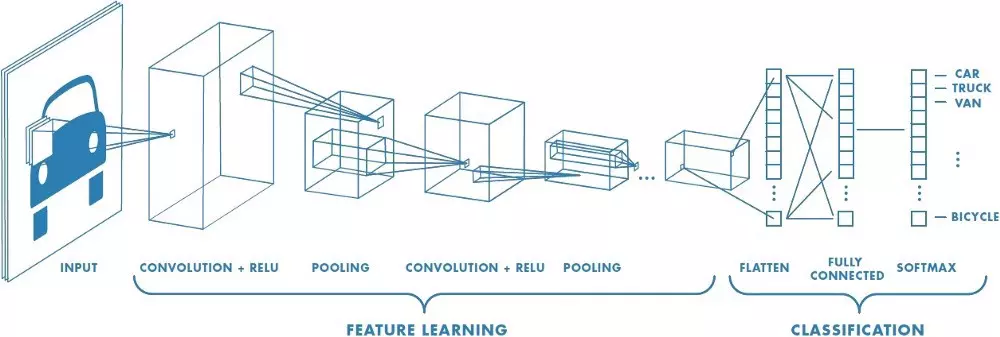

Los distintos tipos de capas en una CNN son los siguientes:

- Capas convolucionales: ejecutan la entrada a través de ciertos filtros, que identifican características en la imagen.
- Capas de agrupación: estas combinan características convolucionales, lo que ayuda en la reducción de características
- Capas planas: convierten una capa N-dimensional en una capa 1D
- Capa de clasificación: la capa final, que nos dice el resultado final

Exploremos ahora los datos.

#El Dataset MNIST 


Como ya se habrá dado cuenta, necesitamos datos etiquetados para entrenar cualquier modelo. En este instructivo, usaremos el conjunto de datos MNIST de dígitos escritos a mano. Este conjunto de datos es parte del paquete Keras. Contiene un conjunto de entrenamiento de 60.000 ejemplos y un conjunto de prueba de 10.000 ejemplos. Entrenaremos los datos en el conjunto de entrenamiento y validaremos los resultados en función de los datos de la prueba. Además, crearemos una imagen propia para probar si el modelo puede predecirla correctamente.

Primero, importemos el conjunto de datos MNIST de Keras. El método .load_data () devuelve los conjuntos de datos de entrenamiento y prueba:

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Intentemos visualizar los dígitos en el conjunto de datos. Si está utilizando cuadernos de Jupyter, use la siguiente función mágica para mostrar diagramas de Matplotlib en línea:

In [4]:
%matplotlib inline

A continuación, importamos el módulo pyplot de matplotlib y usamos el método .imshow () para mostrar la imagen:

La etiqueta de la imagen es: 5


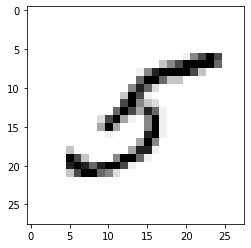

In [7]:
import matplotlib.pyplot as plt

image_index = 35
print("La etiqueta de la imagen es:", y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

Se imprime la etiqueta de la imagen y luego se muestra la imagen.

Verifiquemos los tamaños de los conjuntos de datos de entrenamiento y prueba:


In [8]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Observamos que tenemos 60.000 imágenes de entrenamiento y 10.000 de test, y que cada imagen tiene las dimensiones 28 x 28 pixels

A continuación, es posible que también deseemos explorar la variable dependiente, almacenada en y_train. Imprimamos todas las etiquetas hasta el dígito que visualizamos arriba:

In [9]:
print(y_train[:image_index + 1])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5]


##Limpieza de datos
Ahora que hemos visto la estructura de los datos, trabajemos más en ella antes de crear el modelo.

Para trabajar con la API de Keras, necesitamos remodelar cada imagen al formato de (M x N x 1). Usaremos el método .reshape () para realizar esta acción. Finalmente, normalice los datos de la imagen dividiendo cada valor de píxel por 255 (ya que los valores RGB pueden oscilar entre 0 y 255):

In [11]:
# save input image dimensions
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) / 255
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) / 255

#x_train /= 255
#x_test /= 255

A continuación, necesitamos convertir la variable dependiente en forma de números enteros en una matriz de clase binaria. Esto se puede lograr mediante la función to_categorical ():

In [12]:
from keras.utils import to_categorical
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

ImportError: ignored

¡Ahora estamos listos para crear el modelo y entrenarlo!